<a href="https://colab.research.google.com/github/Kaustubh-20/ML_Practice/blob/main/Exploring_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/iris_data.csv")

**Dataset link: https://drive.google.com/file/d/1cegLYtF_IWCKqqh_LYJZ_MXzjPiF2nk-/view?usp=sharing**

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("Dataset shape:", data.shape)


Dataset shape: (150, 6)


In [ ]:
data.isnull().any().any()


False

In [ ]:
x = data.loc[:, ['SepalLengthCm',	'SepalWidthCm']].values

In [ ]:
print(x.shape)

(150, 2)


**Finding 2 data points within minimum distance for each data point**

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours


**The distances are sorted in an increasing order and later plotted**

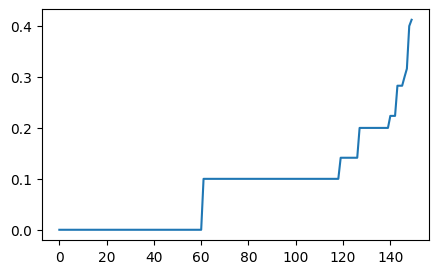

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

**INFERENCE: Data points between 0-60 have no distance between them and forming a cluster, similary with data points between 60-120**

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.35, min_samples = 5).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

**We use DBSCAN to form clusters with core points having epsilon radius as 0.35 and min_samples are 5**

<ipython-input-10-386efe88db40>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("plasma", np.max(labels) + 1)


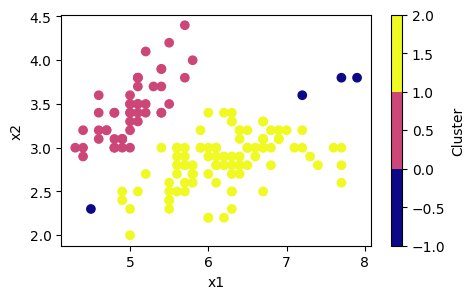

In [ ]:
# Choose a colormap for coloring clusters
colormap = plt.cm.get_cmap("plasma", np.max(labels) + 1)
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap=colormap)  # Plotting the clusters
plt.xlabel("x1")  # X-axis label
plt.ylabel("x2")  # Y-axis label

# Colorbar for cluster legend
plt.colorbar(label="Cluster")

plt.show()  # Showing the plot


In the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm, three primary types of data points play essential roles in the clustering process:

1. Core Points:

   Core points serve as the central elements within clusters identified by DBSCAN.
   A data point qualifies as a core point if it has a minimum of "MinPoints" neighbors (including itself) within a distance specified by ε (epsilon).
   Core points are characterized by their high data density, indicating they are surrounded by a sufficient number of nearby data points.
   They form the core, or nucleus, around which clusters are built and expanded in the DBSCAN algorithm.

2. Border Points:

   Border points are data points that fall within the ε-radius of a core point but do not meet the density requirement to be classified as core points themselves.
   These points are integral to clusters but are not as central or dense as core points.
   Border points exist on the edges or periphery of clusters and might have fewer neighbors within the ε-radius compared to core points.
   They are included within the cluster and are primarily connected to core points, helping to delineate the cluster's boundaries.

3. Noise Points (Outliers):

   Noise points, often referred to as outliers, are data points that do not belong to any specific cluster.
   These points lack both a sufficient number of neighbors within the ε-radius and proximity to any core point.
   Noise points are typically isolated data points that do not exhibit a meaningful cluster association and are considered noise within the dataset.
   DBSCAN explicitly labels these points as outliers, making the algorithm robust in handling noisy or irrelevant data.

These three categories of data points, core points, border points, and noise points, are fundamental to the DBSCAN algorithm's ability to identify clusters based on data density, without requiring a prior specification of the number of clusters.